In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns
import plotly.offline as py
import plotly.figure_factory as ff
import plotly.graph_objs as go
from xgboost import plot_importance
import sklearn 
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from pandas import DataFrame
from sklearn import preprocessing
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split

D:\ANOCONDA3\lib\site-packages\xgboost\compat.py:36: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df_train = pd.read_csv('datatraining.txt', header=0)
df_val = pd.read_csv('datatest.txt', header=0)
df_test = pd.read_csv('datatest2.txt',header = 0)

In [4]:
df_val

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
140,2015-02-02 14:19:00,23.700000,26.272000,585.200000,749.200000,0.004764,1
141,2015-02-02 14:19:59,23.718000,26.290000,578.400000,760.400000,0.004773,1
142,2015-02-02 14:21:00,23.730000,26.230000,572.666667,769.666667,0.004765,1
143,2015-02-02 14:22:00,23.722500,26.125000,493.750000,774.750000,0.004744,1
144,2015-02-02 14:23:00,23.754000,26.200000,488.600000,779.000000,0.004767,1
...,...,...,...,...,...,...,...
2800,2015-02-04 10:38:59,24.290000,25.700000,808.000000,1150.250000,0.004829,1
2801,2015-02-04 10:40:00,24.330000,25.736000,809.800000,1129.200000,0.004848,1
2802,2015-02-04 10:40:59,24.330000,25.700000,817.000000,1125.800000,0.004841,1
2803,2015-02-04 10:41:59,24.356667,25.700000,813.000000,1123.000000,0.004849,1


In [5]:
df_train

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,2015-02-04 17:51:00,23.18,27.2720,426.0,721.250000,0.004793,1
2,2015-02-04 17:51:59,23.15,27.2675,429.5,714.000000,0.004783,1
3,2015-02-04 17:53:00,23.15,27.2450,426.0,713.500000,0.004779,1
4,2015-02-04 17:54:00,23.15,27.2000,426.0,708.250000,0.004772,1
5,2015-02-04 17:55:00,23.10,27.2000,426.0,704.500000,0.004757,1
...,...,...,...,...,...,...,...
8139,2015-02-10 09:29:00,21.05,36.0975,433.0,787.250000,0.005579,1
8140,2015-02-10 09:29:59,21.05,35.9950,433.0,789.500000,0.005563,1
8141,2015-02-10 09:30:59,21.10,36.0950,433.0,798.500000,0.005596,1
8142,2015-02-10 09:32:00,21.10,36.2600,433.0,820.333333,0.005621,1


In [6]:
df_test

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,2015-02-11 14:48:00,21.7600,31.133333,437.333333,1029.666667,0.005021,1
2,2015-02-11 14:49:00,21.7900,31.000000,437.333333,1000.000000,0.005009,1
3,2015-02-11 14:50:00,21.7675,31.122500,434.000000,1003.750000,0.005022,1
4,2015-02-11 14:51:00,21.7675,31.122500,439.000000,1009.500000,0.005022,1
5,2015-02-11 14:51:59,21.7900,31.133333,437.333333,1005.666667,0.005030,1
...,...,...,...,...,...,...,...
9748,2015-02-18 09:15:00,20.8150,27.717500,429.750000,1505.250000,0.004213,1
9749,2015-02-18 09:16:00,20.8650,27.745000,423.500000,1514.500000,0.004230,1
9750,2015-02-18 09:16:59,20.8900,27.745000,423.500000,1521.500000,0.004237,1
9751,2015-02-18 09:17:59,20.8900,28.022500,418.750000,1632.000000,0.004279,1


In [7]:
df = pd.concat([df_train,df_test,df_val])

In [8]:
df = df.reset_index()
df = df.drop(columns=['index'])
df

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,2015-02-04 17:51:00,23.180000,27.272000,426.0,721.25,0.004793,1
1,2015-02-04 17:51:59,23.150000,27.267500,429.5,714.00,0.004783,1
2,2015-02-04 17:53:00,23.150000,27.245000,426.0,713.50,0.004779,1
3,2015-02-04 17:54:00,23.150000,27.200000,426.0,708.25,0.004772,1
4,2015-02-04 17:55:00,23.100000,27.200000,426.0,704.50,0.004757,1
...,...,...,...,...,...,...,...
20555,2015-02-04 10:38:59,24.290000,25.700000,808.0,1150.25,0.004829,1
20556,2015-02-04 10:40:00,24.330000,25.736000,809.8,1129.20,0.004848,1
20557,2015-02-04 10:40:59,24.330000,25.700000,817.0,1125.80,0.004841,1
20558,2015-02-04 10:41:59,24.356667,25.700000,813.0,1123.00,0.004849,1


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20560 entries, 0 to 20559
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           20560 non-null  object 
 1   Temperature    20560 non-null  float64
 2   Humidity       20560 non-null  float64
 3   Light          20560 non-null  float64
 4   CO2            20560 non-null  float64
 5   HumidityRatio  20560 non-null  float64
 6   Occupancy      20560 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 1.1+ MB


In [10]:
df.describe()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
count,20560.000000,20560.000000,20560.000000,20560.000000,20560.000000,20560.000000
mean,20.906212,27.655925,130.756622,690.553276,0.004228,0.231031
std,1.055315,4.982154,210.430875,311.201281,0.000768,0.421503
min,19.000000,16.745000,0.000000,412.750000,0.002674,0.000000
25%,20.200000,24.500000,0.000000,460.000000,0.003719,0.000000
50%,20.700000,27.290000,0.000000,565.416667,0.004292,0.000000
75%,21.525000,31.290000,301.000000,804.666667,0.004832,0.000000
max,24.408333,39.500000,1697.250000,2076.500000,0.006476,1.000000


# Data Exploration

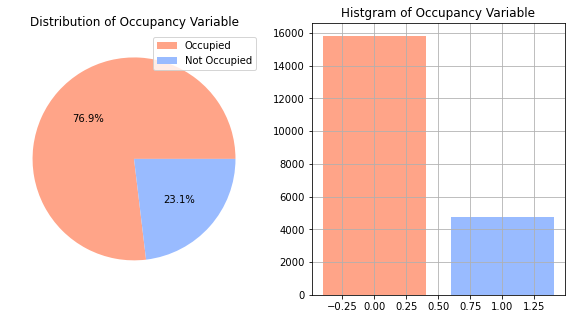

In [11]:
bar_x = [0,1]
bar_height = df['Occupancy'].value_counts().values

plt.figure(figsize=(10,5))

# pie chart 
plt.subplot(1, 2, 1)
plt.pie(df['Occupancy'].value_counts(),colors=['#FFA488','#99BBFF'],autopct='%1.1f%%')
plt.legend(['Occupied','Not Occupied'],loc='best')
plt.title('Distribution of Occupancy Variable')

# bar chart
plt.subplot(1, 2, 2)
plt.bar(x= bar_x,height= bar_height,
        color= ['#FFA488','#99BBFF'])
plt.title('Histgram of Occupancy Variable')
plt.grid()

plt.show()

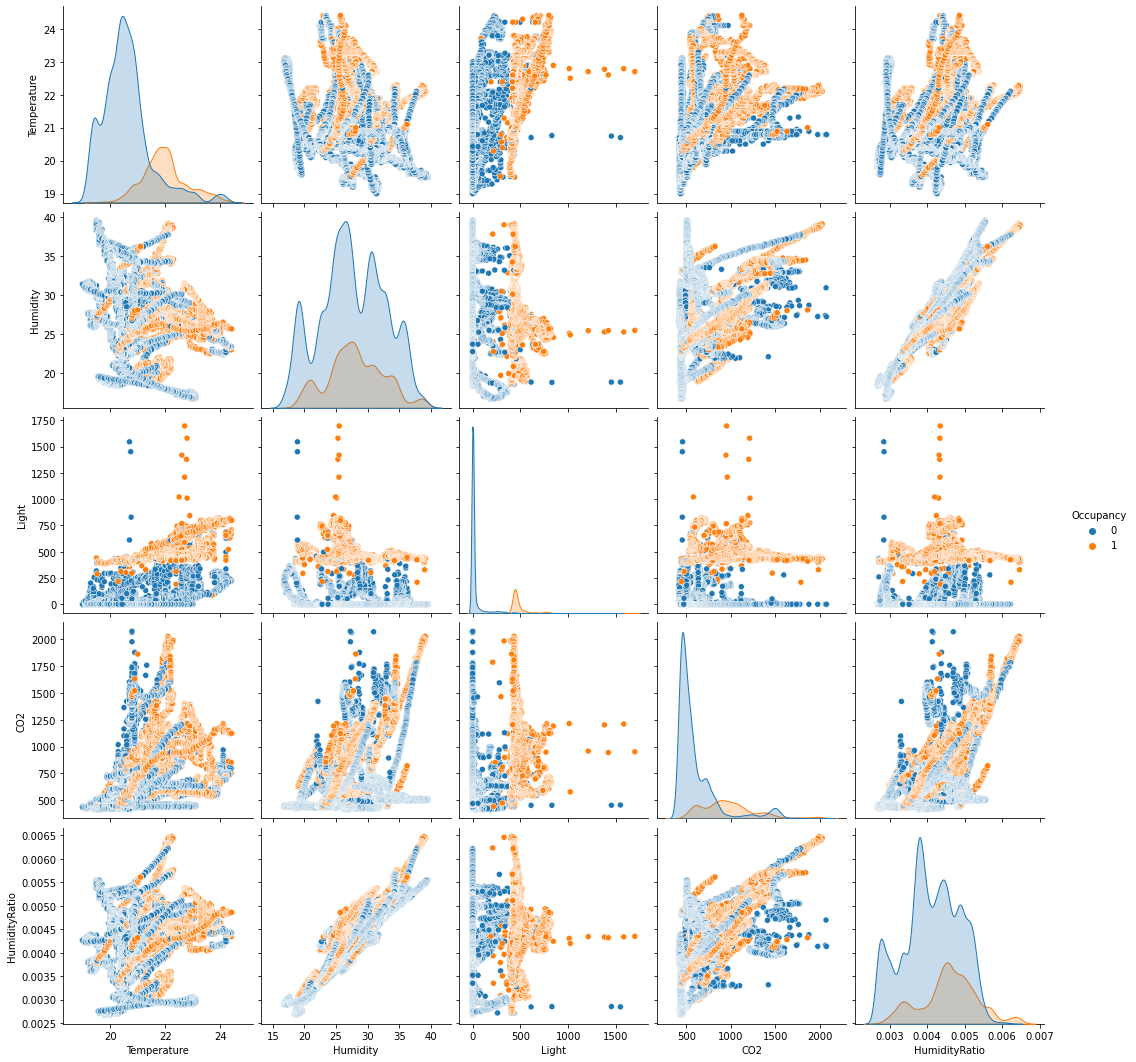

In [12]:
sns.pairplot(df, hue="Occupancy", height=3, diag_kind="kde")

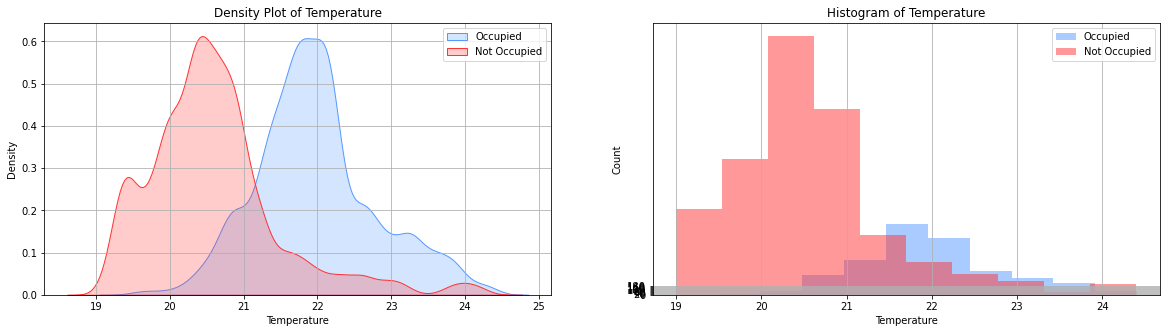

In [13]:
plt.figure(figsize=(20,5))

# density plot
plt.subplot(1, 2, 1)
# KDE plot of Occupancy 
sns.kdeplot(df.loc[df['Occupancy'] != 0, 'Temperature'], label = 'target == 0',color='#5599FF',fill=True)

# KDE plot of healthy 
sns.kdeplot(df.loc[df['Occupancy'] == 0, 'Temperature'], label = 'target == 1',color='#FF3333',fill=True)

# Labeling of plot
plt.xlabel('Temperature')
plt.ylabel('Density')
plt.legend(['Occupied','Not Occupied'],loc='upper right')
plt.title('Density Plot of Temperature')
plt.grid()

# histgram plot
plt.subplot(1, 2, 2)
plt.hist(df.loc[df['Occupancy'] != 0, 'Temperature'].reset_index(drop=True), alpha=0.5, label="Occupied",color='#5599FF')
plt.hist(df.loc[df['Occupancy'] == 0, 'Temperature'].reset_index(drop=True), alpha=0.5, label="Not Occupied",color='#FF3333')
plt.legend()
plt.xlabel('Temperature')
plt.ylabel('Count')
plt.yticks(np.arange(0, 200, 20))
plt.title('Histogram of Temperature')
plt.grid()


plt.show()

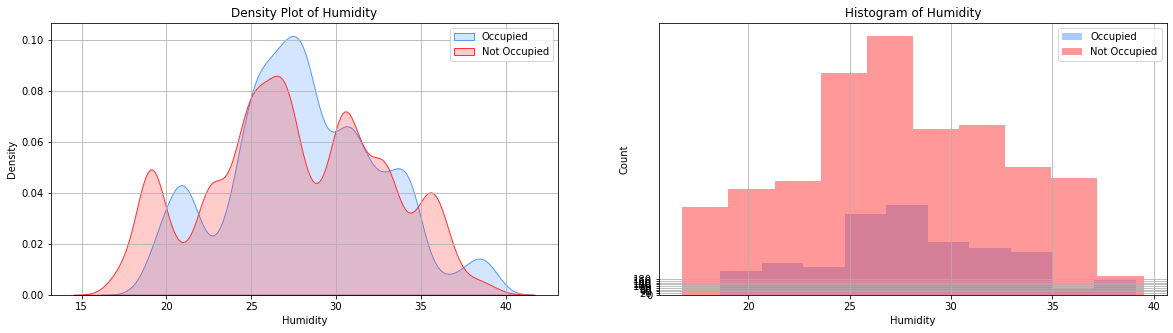

In [14]:
plt.figure(figsize=(20,5))

# density plot
plt.subplot(1, 2, 1)
# KDE plot of Occupancy 
sns.kdeplot(df.loc[df['Occupancy'] != 0, 'Humidity'], label = 'target == 0',color='#5599FF',fill=True)

# KDE plot of healthy 
sns.kdeplot(df.loc[df['Occupancy'] == 0, 'Humidity'], label = 'target == 1',color='#FF3333',fill=True)

# Labeling of plot
plt.xlabel('Humidity')
plt.ylabel('Density')
plt.legend(['Occupied','Not Occupied'],loc='upper right')
plt.title('Density Plot of Humidity')
plt.grid()

# histgram plot
plt.subplot(1, 2, 2)
plt.hist(df.loc[df['Occupancy'] != 0, 'Humidity'].reset_index(drop=True), alpha=0.5, label="Occupied",color='#5599FF')
plt.hist(df.loc[df['Occupancy'] == 0, 'Humidity'].reset_index(drop=True), alpha=0.5, label="Not Occupied",color='#FF3333')
plt.legend()
plt.xlabel('Humidity')
plt.ylabel('Count')
plt.yticks(np.arange(0, 200, 20))
plt.title('Histogram of Humidity')
plt.grid()


plt.show()

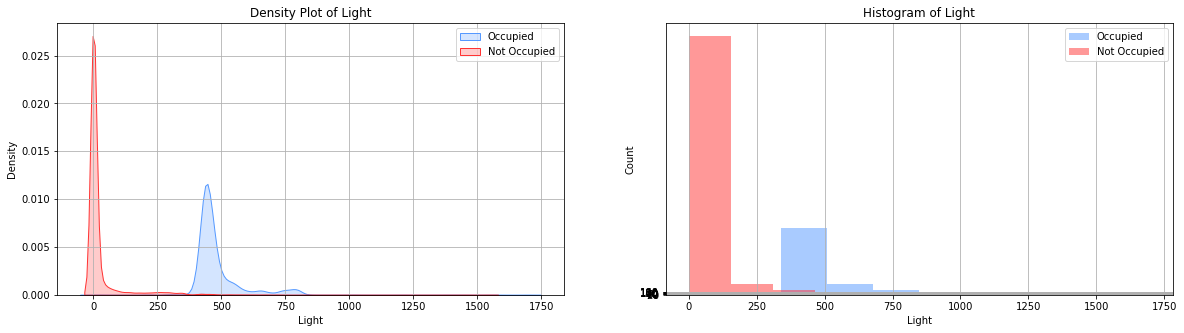

In [15]:
plt.figure(figsize=(20,5))

# density plot
plt.subplot(1, 2, 1)
# KDE plot of Occupancy 
sns.kdeplot(df.loc[df['Occupancy'] != 0, 'Light'], label = 'target == 0',color='#5599FF',fill=True)

# KDE plot of healthy 
sns.kdeplot(df.loc[df['Occupancy'] == 0, 'Light'], label = 'target == 1',color='#FF3333',fill=True)

# Labeling of plot
plt.xlabel('Light')
plt.ylabel('Density')
plt.legend(['Occupied','Not Occupied'],loc='upper right')
plt.title('Density Plot of Light')
plt.grid()

# histgram plot
plt.subplot(1, 2, 2)
plt.hist(df.loc[df['Occupancy'] != 0, 'Light'].reset_index(drop=True), alpha=0.5, label="Occupied",color='#5599FF')
plt.hist(df.loc[df['Occupancy'] == 0, 'Light'].reset_index(drop=True), alpha=0.5, label="Not Occupied",color='#FF3333')
plt.legend()
plt.xlabel('Light')
plt.ylabel('Count')
plt.yticks(np.arange(0, 200, 20))
plt.title('Histogram of Light')
plt.grid()


plt.show()

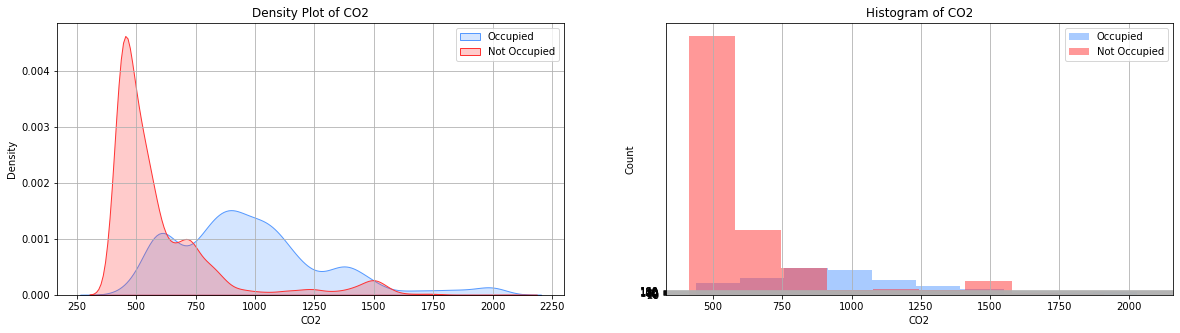

In [16]:
plt.figure(figsize=(20,5))

# density plot
plt.subplot(1, 2, 1)
# KDE plot of Occupancy 
sns.kdeplot(df.loc[df['Occupancy'] != 0, 'CO2'], label = 'target == 0',color='#5599FF',fill=True)

# KDE plot of healthy 
sns.kdeplot(df.loc[df['Occupancy'] == 0, 'CO2'], label = 'target == 1',color='#FF3333',fill=True)

# Labeling of plot
plt.xlabel('CO2')
plt.ylabel('Density')
plt.legend(['Occupied','Not Occupied'],loc='upper right')
plt.title('Density Plot of CO2')
plt.grid()

# histgram plot
plt.subplot(1, 2, 2)
plt.hist(df.loc[df['Occupancy'] != 0, 'CO2'].reset_index(drop=True), alpha=0.5, label="Occupied",color='#5599FF')
plt.hist(df.loc[df['Occupancy'] == 0, 'CO2'].reset_index(drop=True), alpha=0.5, label="Not Occupied",color='#FF3333')
plt.legend()
plt.xlabel('CO2')
plt.ylabel('Count')
plt.yticks(np.arange(0, 200, 20))
plt.title('Histogram of CO2')
plt.grid()


plt.show()

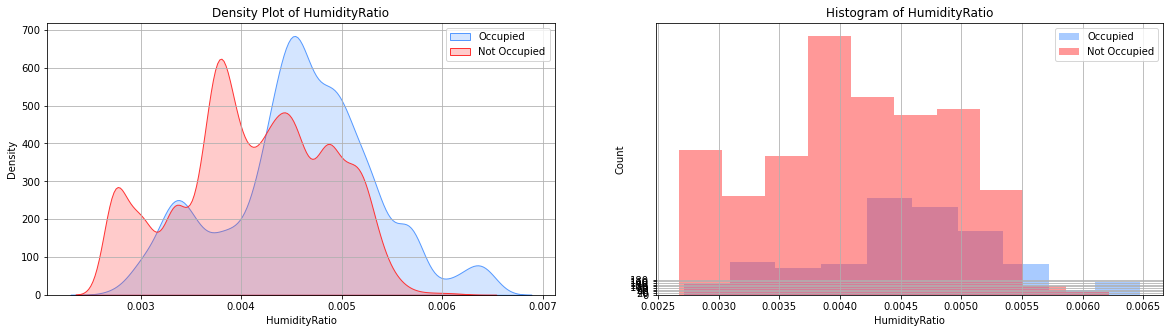

In [17]:
plt.figure(figsize=(20,5))

# density plot
plt.subplot(1, 2, 1)
# KDE plot of Occupancy 
sns.kdeplot(df.loc[df['Occupancy'] != 0, 'HumidityRatio'], label = 'target == 0',color='#5599FF',fill=True)

# KDE plot of healthy 
sns.kdeplot(df.loc[df['Occupancy'] == 0, 'HumidityRatio'], label = 'target == 1',color='#FF3333',fill=True)

# Labeling of plot
plt.xlabel('HumidityRatio')
plt.ylabel('Density')
plt.legend(['Occupied','Not Occupied'],loc='upper right')
plt.title('Density Plot of HumidityRatio')
plt.grid()

# histgram plot
plt.subplot(1, 2, 2)
plt.hist(df.loc[df['Occupancy'] != 0, 'HumidityRatio'].reset_index(drop=True), alpha=0.5, label="Occupied",color='#5599FF')
plt.hist(df.loc[df['Occupancy'] == 0, 'HumidityRatio'].reset_index(drop=True), alpha=0.5, label="Not Occupied",color='#FF3333')
plt.legend()
plt.xlabel('HumidityRatio')
plt.ylabel('Count')
plt.yticks(np.arange(0, 200, 20))
plt.title('Histogram of HumidityRatio')
plt.grid()


plt.show()

# Preprocessing

In [18]:
# Drop the date column that's not relevant to occupancy by instinct 
df = df.drop(columns=['date'])

In [19]:
# Select Features by Random Forest
X = df.drop(['Occupancy'],axis=1)
y = df['Occupancy']
feature_names = [f"feature {i}" for i in range(X.shape[1])]
forest = RandomForestClassifier(random_state=0)
forest.fit(X, y)

importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
forest_importances = pd.Series(importances, index=feature_names)

In [20]:
forest_importances= forest_importances.sort_values(ascending=False)
forest_importances

feature 2    0.688343
feature 0    0.152295
feature 3    0.112118
feature 4    0.026418
feature 1    0.020826
dtype: float64

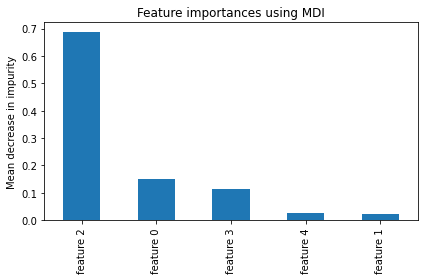

In [21]:
fig, ax = plt.subplots()
forest_importances.plot.bar() #yerr=std, ax=ax
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

Feature 1(Humidity) and Feature 4(HumidityRatio) are the least important features that has minor effect on Occupancy, 
consider the total number of features is only 5, we choose to keep them in the model

In [22]:
# split the train test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Logistic Regression Model

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer, confusion_matrix
from sklearn.model_selection import learning_curve
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, roc_auc_score

In [24]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
print("accuracy score in train dataset :",lr.score(X_train, y_train))
print("accuracy score in test dataset :",lr.score(X_test, y_test))

accuracy score in train dataset : 0.9888827126181212
accuracy score in test dataset : 0.9891374837872893


In [25]:
#confusion matrix
def create_cf(matrix):
  cf_matrix = matrix
  group_names = ['True Neg','False Pos','False Neg','True Pos']
  group_counts = ["{0:0.0f}".format(value) for value in
                  cf_matrix.flatten()]
  group_percentages = ["{0:.2%}".format(value) for value in
                      cf_matrix.flatten()/np.sum(cf_matrix)]
  labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
            zip(group_names,group_counts,group_percentages)]
  labels = np.asarray(labels).reshape(2,2)
  sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

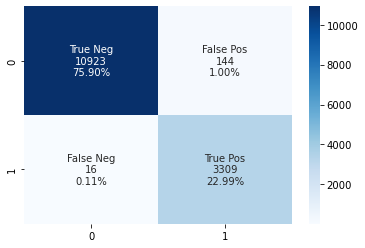

In [26]:
# Trainging CF Matrix
y_pre1 = lr.predict(X_train)
y_pre2 = lr.predict(X_test)
create_cf(confusion_matrix(y_train, y_pre1))

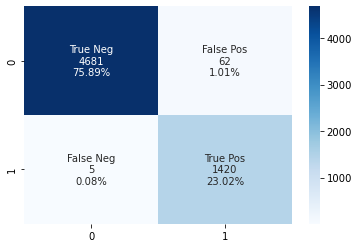

In [27]:
# Testing CF Matrix
create_cf(confusion_matrix(y_test, y_pre2))

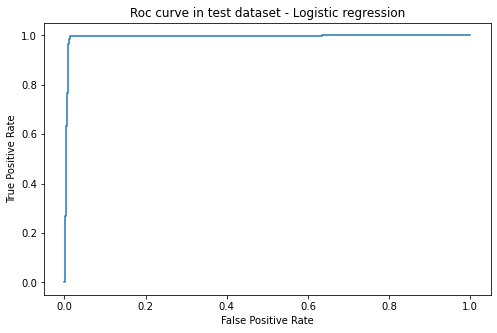

roc_auc_score : 0.9946712237054792


In [28]:
#ROC curve
y_pro2 = lr.predict_proba(X_test)[:,1]
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_pro2)
plt.figure(figsize=(8,5))
plt.plot(false_positive_rate, true_positive_rate)
plt.title('Roc curve in test dataset - Logistic regression')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
print("roc_auc_score :", roc_auc_score(y_test, y_pro2))

# Logistic Regression Model Tuning

In [29]:
#grid search for hyper-parameter C and solver
grid = dict()
grid['solver'] = ['saga', 'liblinear'] 
grid['C'] = np.linspace(0, 5, 20)
log = LogisticRegression()
logreg_cv = GridSearchCV(log, grid, cv=10)
logreg_cv.fit(X_train,y_train)

print("best parameters: ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

best parameters:  {'C': 0.2631578947368421, 'solver': 'liblinear'}
accuracy : 0.9889520596865106


In [30]:
# impletment model with best C and solver 
best_c  = logreg_cv.best_params_.get("C")
best_solver = logreg_cv.best_params_.get("solver")
log_best = LogisticRegression(penalty='l1', solver = best_solver, C=best_c)
log_best.fit(X_train,y_train)
print("accuracy score in train dataset :",log_best.score(X_train, y_train))
print("accuracy score in test dataset :",log_best.score(X_test, y_test))

accuracy score in train dataset : 0.988952195664258
accuracy score in test dataset : 0.9891374837872893


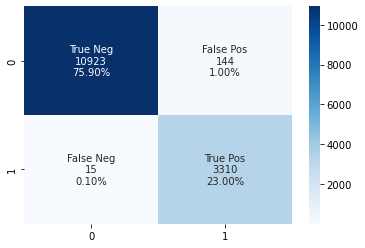

In [31]:
# Trainging CF Matrix
y_pre3 = log_best.predict(X_train)
y_pre4 = log_best.predict(X_test)
create_cf(confusion_matrix(y_train, y_pre3))

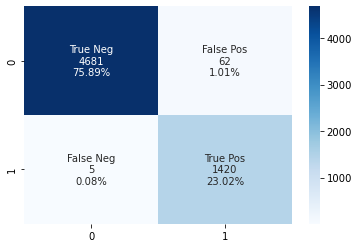

In [32]:
# Testing CF Matrix
create_cf(confusion_matrix(y_test, y_pre4))

# Random Forest Model

In [33]:
from sklearn.ensemble import RandomForestClassifier

In [34]:
forest = RandomForestClassifier(random_state=0)
forest.fit(X_train, y_train)
print("accuracy score in train dataset :",forest.score(X_train, y_train))
print("accuracy score in test dataset :",forest.score(X_test, y_test))

accuracy score in train dataset : 1.0
accuracy score in test dataset : 0.992704280155642


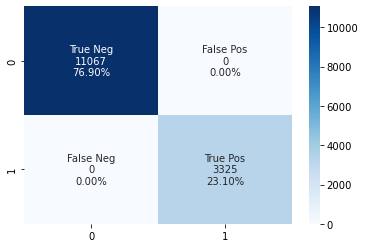

In [35]:
# Trainging CF Matrix
y_pre5 = forest.predict(X_train)
y_pre6 = forest.predict(X_test)
create_cf(confusion_matrix(y_train, y_pre5))

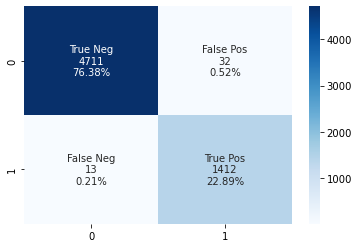

In [36]:
# Testing CF Matrix
create_cf(confusion_matrix(y_test, y_pre6))

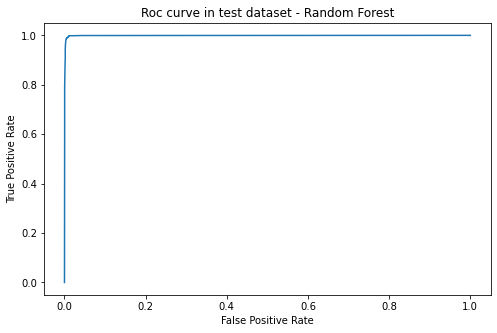

roc_auc_score : 0.9990134306882533


In [37]:
#ROC curve
y_pro3 = forest.predict_proba(X_test)[:,1]
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_pro3)
plt.figure(figsize=(8,5))
plt.plot(false_positive_rate, true_positive_rate)
plt.title('Roc curve in test dataset - Random Forest')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
print("roc_auc_score :", roc_auc_score(y_test, y_pro3))

# Random Forest Model Tuning

In [38]:
#grid search for hyper-parameter C and solver
grid = dict()
grid['n_estimators'] = [2,5,10,20,50,100,200]
grid['max_features'] = ['sqrt', 'log2', None]
rf = RandomForestClassifier(random_state=0)
rf_cv = GridSearchCV(rf, grid, cv=10)
rf_cv.fit(X_train,y_train)

print("best parameters: ",rf_cv.best_params_)
print("accuracy :",rf_cv.best_score_)

best parameters:  {'max_features': 'sqrt', 'n_estimators': 100}
accuracy : 0.992078700486449


In [39]:
# impletment model with best C and solver 
best_n_estimators  = rf_cv.best_params_.get("n_estimators")
best_max_features = rf_cv.best_params_.get("max_features")
rf_best = RandomForestClassifier(random_state=0, max_features = best_max_features, n_estimators=best_n_estimators)
rf_best.fit(X_train,y_train)
print("accuracy score in train dataset :",rf_best.score(X_train, y_train))
print("accuracy score in test dataset :",rf_best.score(X_test, y_test))

accuracy score in train dataset : 1.0
accuracy score in test dataset : 0.992704280155642


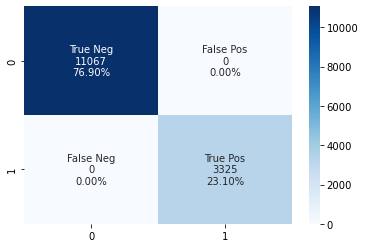

In [40]:
# Trainging CF Matrix
y_pre7 = forest.predict(X_train)
y_pre8 = forest.predict(X_test)
create_cf(confusion_matrix(y_train, y_pre7))

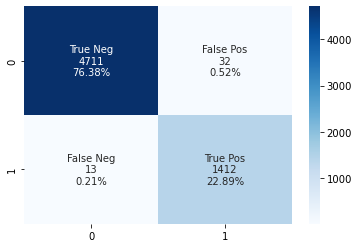

In [41]:
# Testing CF Matrix
create_cf(confusion_matrix(y_test, y_pre8))